In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(30,1)})
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
# ! pip install nltk
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# magic word for producing visualizations in notebook
%matplotlib inline

/Users/sammitranade/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/sammitranade/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Gather
Airbnb has open sourced some of their datasets [here](http://insideairbnb.com/get-the-data.html). 

I chose the Amsterdam dataset as Amsterdam is one of the places I would like to visit.

In [2]:
# listings dataset contains Detailed Listings data for Amsterdam

listings = pd.read_csv("listings.csv")

# calendar dataset contains Detailed Calendar Data for listings in Amsterdam

calendar = pd.read_csv("calendar.csv")

# reviews dataset contains Detailed Review Data for listings in Amsterdam

reviews = pd.read_csv("reviews.csv")

/Users/sammitranade/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Assess
Skimming through the data to get to know the data better.

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20191207212953,2019-12-08,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.13
1,20168,https://www.airbnb.com/rooms/20168,20191207212953,2019-12-08,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,For those who like all facets of city life. In...,17th century Dutch townhouse in the heart of t...,none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.57
2,25428,https://www.airbnb.com/rooms/25428,20191207212953,2019-12-08,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,20191207212953,2019-12-08,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.14
4,28871,https://www.airbnb.com/rooms/28871,20191207212953,2019-12-08,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.81


In [4]:
calendar[calendar.listing_id==2818]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2019-12-08,f,$51.00,$51.00,3.0,1125.0
445,2818,2019-12-09,t,$49.00,$49.00,3.0,1125.0
446,2818,2019-12-10,t,$49.00,$49.00,3.0,1125.0
447,2818,2019-12-11,t,$49.00,$49.00,3.0,1125.0
448,2818,2019-12-12,t,$49.00,$49.00,3.0,1125.0
449,2818,2019-12-13,t,$59.00,$59.00,3.0,1125.0
450,2818,2019-12-14,t,$59.00,$59.00,3.0,1125.0
451,2818,2019-12-15,t,$51.00,$51.00,3.0,1125.0
452,2818,2019-12-16,t,$49.00,$49.00,3.0,1125.0
453,2818,2019-12-17,f,$51.00,$51.00,3.0,1125.0


In [5]:
reviews[reviews.listing_id==2818]

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...
5,2818,4748,2009-06-29,20192,Jie,Daniel was a great host! He made everything so...
6,2818,5202,2009-07-07,23055,Vanessa,Daniele is an amazing host! He provided everyt...
7,2818,9131,2009-09-06,26343,Katja,You can´t have a nicer start in Amsterdam. Dan...
8,2818,12103,2009-10-01,40999,Marie-Eve,Daniel was a fantastic host. His place is calm...
9,2818,16196,2009-11-04,38623,Graham,Daniel was great. He couldn.t do enough for us...


In [6]:
# checking the number of rows and columns in each dataframe

print("Shape of listings df:", listings.shape)
print("Shape of calendar df:", calendar.shape)
print("Shape of reviews df:", reviews.shape)

Shape of listings df: (20025, 106)
Shape of calendar df: (7309206, 7)
Shape of reviews df: (493815, 6)


In [7]:
# checking the datatypes of the columns

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20025 entries, 0 to 20024
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 16.2+ MB


In [8]:
print(list(listings.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [9]:
listings['calendar_last_scraped'].value_counts()

2019-12-08    18136
2019-12-07     1889
Name: calendar_last_scraped, dtype: int64

In [10]:
# checking the datatypes of the columns

calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7309206 entries, 0 to 7309205
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 390.4+ MB


In [11]:
# checking the datatypes of the columns

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493815 entries, 0 to 493814
Data columns (total 6 columns):
listing_id       493815 non-null int64
id               493815 non-null int64
date             493815 non-null object
reviewer_id      493815 non-null int64
reviewer_name    493815 non-null object
comments         493583 non-null object
dtypes: int64(3), object(3)
memory usage: 22.6+ MB


In [12]:
# checking the number of null values in each column of listings dataframe

np.sum(listings.isna())

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               34
summary                                           635
space                                            5371
description                                       242
experiences_offered                                 0
neighborhood_overview                            6384
notes                                           11636
transit                                          6103
access                                           8691
interaction                                      7931
house_rules                                      7810
thumbnail_url                                   20025
medium_url                                      20025
picture_url                                         0
xl_picture_url              

In [13]:
# checking the number of null values in each column of calendar dataframe

np.sum(calendar.isna())

listing_id         0
date               0
available          0
price              0
adjusted_price     0
minimum_nights    52
maximum_nights    52
dtype: int64

In [14]:
# checking the number of null values in each column of reviews dataframe

np.sum(reviews.isna())

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         232
dtype: int64

## Data Cleaning
### Handling missing values

(array([72.,  2.,  0., 10.,  1.,  0.,  1.,  4.,  0.,  2.,  2.,  2.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  7.]),
 array([    0.,   801.,  1602.,  2403.,  3204.,  4005.,  4806.,  5607.,
         6408.,  7209.,  8010.,  8811.,  9612., 10413., 11214., 12015.,
        12816., 13617., 14418., 15219., 16020., 16821., 17622., 18423.,
        19224., 20025.]),
 <a list of 25 Patch objects>)

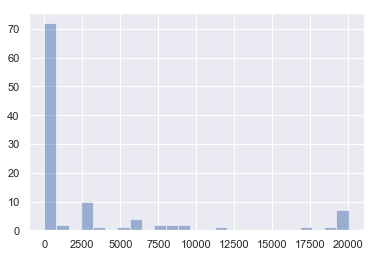

In [15]:
# plotting the histogram for ~ number of columns versus number of null values

missing_cols = listings.isnull().sum()
plt.hist(missing_cols, bins = 25, alpha = 0.5)

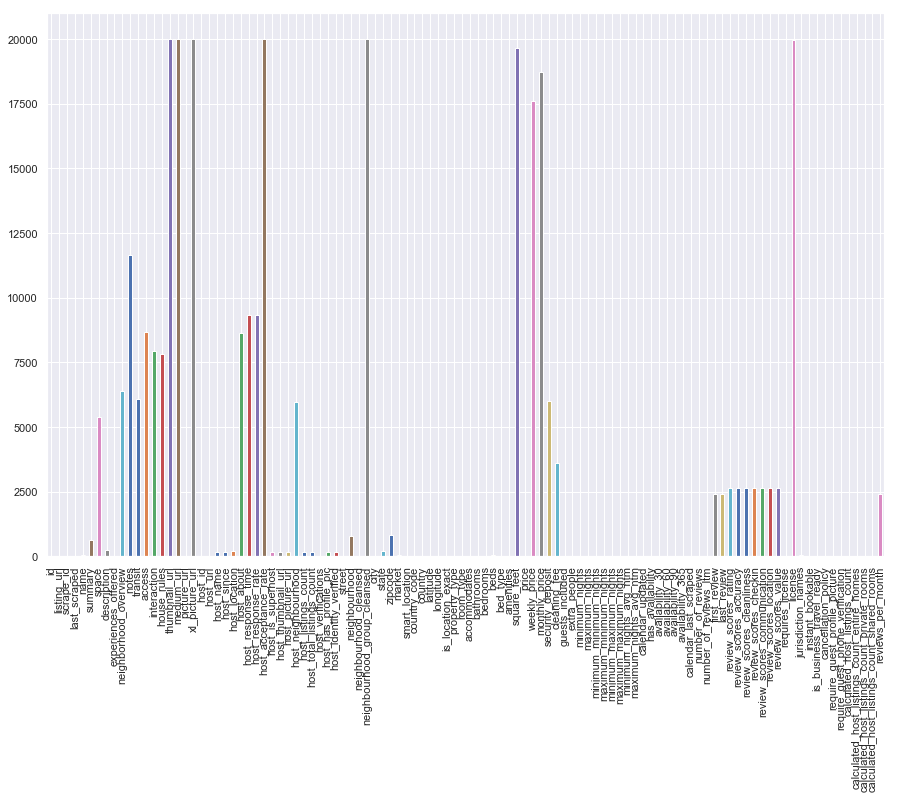

In [16]:
# plotting a barplot for number of missing values versus the columns

missing_cols.plot.bar(figsize=(15,10))
plt.show()

In [17]:
# the outlier columns - i.e. cols with missing or unknown values with more than 12%
# 12 % is the benchmark value decided by me by looking at the above graph
missing_12 = [col for col in listings.columns if (listings[col].isnull().sum()/listings.shape[0]) * 100 > 12]
print(len(missing_12))

# deleting the columns which have more than 12% of null values
for cols in missing_12:
    del listings[cols]

32


(array([56.,  3.,  0.,  0.,  9.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([  0.  ,  33.08,  66.16,  99.24, 132.32, 165.4 , 198.48, 231.56,
        264.64, 297.72, 330.8 , 363.88, 396.96, 430.04, 463.12, 496.2 ,
        529.28, 562.36, 595.44, 628.52, 661.6 , 694.68, 727.76, 760.84,
        793.92, 827.  ]),
 <a list of 25 Patch objects>)

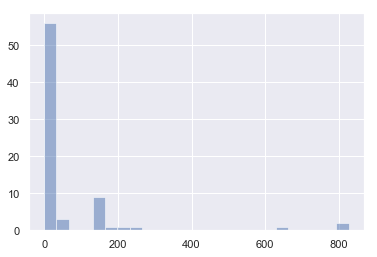

In [18]:
# re-plotting the histogram for ~ number of columns versus number of null values

missing_less_than_12 = listings.isnull().sum()
#plt.hist(missing_cols, bins = 25, alpha = 0.5)
#df1 = 
plt.hist(missing_less_than_12, bins = 25, alpha = 0.5)

In [19]:
print(missing_less_than_12)

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
name                                             34
summary                                         635
description                                     242
experiences_offered                               0
picture_url                                       0
host_id                                           0
host_url                                          0
host_name                                       158
host_since                                      158
host_location                                   192
host_is_superhost                               158
host_thumbnail_url                              158
host_picture_url                                158
host_listings_count                             158
host_total_listings_count                       158
host_verific

In [20]:
# now the updated number of columns

len(listings.columns)

74

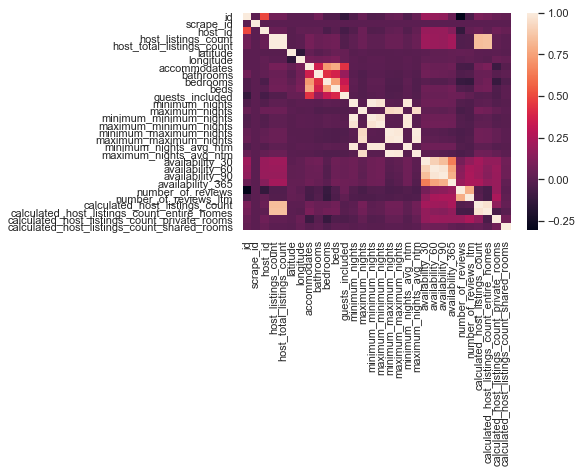

In [21]:
# correlation heatmap

corr_analysis = listings.corr()
sns.heatmap(corr_analysis, xticklabels=corr_analysis.columns.values, yticklabels=corr_analysis.columns.values)

In [22]:
missing_rows = listings.isnull().sum(axis=1)

In [23]:
missing_rows.value_counts().sort_index()

0     17472
1      1951
2       397
3        40
4         7
10      138
11       16
12        3
14        1
dtype: int64

In [24]:
# checking rows that have more than 2 values missing

rows_with_missing_few = missing_rows[missing_rows <= 2]
rows_with_missing_large = missing_rows[missing_rows > 2]
print(len(rows_with_missing_few))
print(len(rows_with_missing_large))

19820
205


In [25]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20025 entries, 0 to 20024
Data columns (total 74 columns):
id                                              20025 non-null int64
listing_url                                     20025 non-null object
scrape_id                                       20025 non-null int64
last_scraped                                    20025 non-null object
name                                            19991 non-null object
summary                                         19390 non-null object
description                                     19783 non-null object
experiences_offered                             20025 non-null object
picture_url                                     20025 non-null object
host_id                                         20025 non-null int64
host_url                                        20025 non-null object
host_name                                       19867 non-null object
host_since                                      19867 

In [26]:
# dropping rows with null values

rows_dropped = listings.dropna(axis=0)

In [27]:
rows_dropped.reset_index(inplace=True)

In [28]:
rows_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 75 columns):
index                                           17472 non-null int64
id                                              17472 non-null int64
listing_url                                     17472 non-null object
scrape_id                                       17472 non-null int64
last_scraped                                    17472 non-null object
name                                            17472 non-null object
summary                                         17472 non-null object
description                                     17472 non-null object
experiences_offered                             17472 non-null object
picture_url                                     17472 non-null object
host_id                                         17472 non-null int64
host_url                                        17472 non-null object
host_name                                       17472 n

### Handling Categorical Variables

In [29]:
# checking columns that are categorical

rows_dropped.select_dtypes(include='object').columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'description',
       'experiences_offered', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'requires_license',
       'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [30]:
# Dropping the columns which I think that won't be useful for me
# by manual inspection and intuition

cols_to_drop = ['listing_url', 'last_scraped', 'name', 'summary', 'description',
       'experiences_offered', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location',
       'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'street',
       'neighbourhood', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country',
       'amenities', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'requires_license',
       'jurisdiction_names', 'is_business_travel_ready']

In [31]:
rows_dropped['require_guest_phone_verification'].value_counts().sort_index()

f    17260
t      212
Name: require_guest_phone_verification, dtype: int64

In [32]:
# rows_dropped.host_has_profile_pic

In [33]:
for column in cols_to_drop:
    del rows_dropped[column]

In [34]:
rows_dropped.select_dtypes(include='object').columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'is_location_exact', 'property_type',
       'room_type', 'bed_type', 'price', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [35]:
# since t and f are strings, converting those to boolean using map function

vals_to_replace = {"t":1, "f":0}

In [36]:
tORf = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
        'is_location_exact', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification']

In [37]:
for column in tORf:
    rows_dropped[column] = rows_dropped[column].map(vals_to_replace)

/Users/sammitranade/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
# `price` is the target variable, so keeping aside that for now

final_df = rows_dropped.loc[:, rows_dropped.columns != 'price']

In [39]:
final_df.columns

Index(['index', 'id', 'scrape_id', 'host_id', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'guests_included', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_roo

In [40]:
final_df = pd.get_dummies(final_df)

In [41]:
print(list(final_df.columns))

['index', 'id', 'scrape_id', 'host_id', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'neighbourhood_cleansed_Bos en Lommer', 'neighbourhood_cleansed_Buitenveldert - Zuidas', 'neighbourhood_cleansed_Centrum-Oost', 'neighbourhood_

In [42]:
# cleaning the column names

final_df.columns = final_df.columns.str.replace(' ', '_')

In [43]:
final_df.columns = final_df.columns.str.replace('-', '_')

In [44]:
final_df.columns = final_df.columns.str.replace('__', '_')

In [45]:
print(list(final_df.columns))

['index', 'id', 'scrape_id', 'host_id', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'neighbourhood_cleansed_Bos_en_Lommer', 'neighbourhood_cleansed_Buitenveldert__Zuidas', 'neighbourhood_cleansed_Centrum_Oost', 'neighbourhood_c

In [46]:
# checking whether the categorical columns have been
# handled well or not

final_df.select_dtypes(include='object').columns

Index([], dtype='object')

In [47]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Columns: 102 entries, index to cancellation_policy_super_strict_60
dtypes: float64(9), int64(29), uint8(64)
memory usage: 6.1 MB


In [48]:
# Further Dropping the columns which I think that won't be useful for me
# by manual inspection and intuition

cols_to_drop2 = ['index', 'scrape_id', 'host_listings_count', 'host_total_listings_count', 
                 'host_has_profile_pic',
                 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                 'maximum_maximum_nights', 
                 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews', 'number_of_reviews_ltm', 
                 'calculated_host_listings_count']

In [49]:
# final_df['host_identity_verified'].value_counts().sort_index()

In [50]:
# final_df.calculated_host_listings_count_shared_rooms

In [51]:
for col2 in cols_to_drop2:
    del final_df[col2]

In [52]:
final_df.reset_index(inplace=True)

In [53]:
del final_df['index']

### Analyze

In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 88 columns):
id                                                              17472 non-null int64
host_id                                                         17472 non-null int64
host_is_superhost                                               17472 non-null int64
host_identity_verified                                          17472 non-null int64
latitude                                                        17472 non-null float64
longitude                                                       17472 non-null float64
is_location_exact                                               17472 non-null int64
accommodates                                                    17472 non-null int64
bathrooms                                                       17472 non-null float64
bedrooms                                                        17472 non-null float64
beds                             

In [55]:
# now we have the clean dataframe as required

final_df

,id,host_id,host_is_superhost,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,...,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull_out_Sofa,bed_type_Real_Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,20168,59484,0,0,52.36509,4.89354,1,2,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
1,27886,97647,1,1,52.38673,4.89208,1,2,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
2,29051,124245,1,1,52.36773,4.89151,1,1,1.0,1.0,...,0,0,0,0,1,0,1,0,0,0
3,43980,65041,0,0,52.35746,4.86124,0,2,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
4,46386,207342,0,1,52.35247,4.90825,1,2,1.0,1.0,...,0,0,0,0,1,1,0,0,0,0
5,48076,219080,1,0,52.38042,4.89453,1,4,2.0,3.0,...,0,0,0,0,1,0,0,1,0,0
6,49552,225987,1,1,52.37925,4.89023,1,4,1.0,2.0,...,0,0,0,0,1,0,0,1,0,0
7,50515,231864,0,1,52.37727,4.83925,0,6,1.0,3.0,...,0,0,0,0,1,0,1,0,0,0
8,50518,231806,1,0,52.38201,4.87865,0,2,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
9,50523,231946,1,0,52.36841,4.88413,0,2,1.0,1.0,...,0,0,0,0,1,0,1,0,0,0


In [56]:
final_df.host_id.nunique()

15444

In [57]:
# check if there are any duplicate rows
final_df.duplicated().sum()

0

In [58]:
final_df['price'] = rows_dropped['price']

In [59]:
calendar[calendar.price!=calendar.adjusted_price]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
34600,169356,2019-12-08,f,$165.00,$157.00,7.0,13.0
34601,169356,2019-12-09,f,$165.00,$157.00,7.0,13.0
35455,169356,2019-12-10,f,$165.00,$157.00,7.0,13.0
35456,169356,2019-12-11,f,$165.00,$157.00,7.0,13.0
35457,169356,2019-12-12,f,$165.00,$157.00,7.0,13.0
35458,169356,2019-12-13,f,$165.00,$157.00,7.0,13.0
35459,169356,2019-12-14,f,$165.00,$157.00,7.0,13.0
35460,169356,2019-12-15,f,$165.00,$157.00,7.0,13.0
35461,169356,2019-12-16,f,$165.00,$157.00,7.0,13.0
35462,169356,2019-12-17,f,$165.00,$157.00,7.0,13.0


In [60]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493815 entries, 0 to 493814
Data columns (total 6 columns):
listing_id       493815 non-null int64
id               493815 non-null int64
date             493815 non-null object
reviewer_id      493815 non-null int64
reviewer_name    493815 non-null object
comments         493583 non-null object
dtypes: int64(3), object(3)
memory usage: 22.6+ MB


In [61]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7309206 entries, 0 to 7309205
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 390.4+ MB


In [62]:
final_df[final_df.id==20168]

,id,host_id,host_is_superhost,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,...,bed_type_Couch,bed_type_Futon,bed_type_Pull_out_Sofa,bed_type_Real_Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,price
0,20168,59484,0,0,52.36509,4.89354,1,2,1.0,1.0,...,0,0,0,1,0,0,1,0,0,$80.00


In [63]:
reviews[reviews.listing_id==40612285]

,listing_id,id,date,reviewer_id,reviewer_name,comments


In [64]:
# number of unique listing_ids in reviews df

reviews.listing_id.nunique()

17621

In [65]:
# number of unique listing_ids in calendar df

calendar.listing_id.nunique()

20025

In [66]:
# number of unique listings in our final cleaned dataframe

final_df.id.nunique()

17472

In [67]:
final_df.select_dtypes(include='object').columns

Index(['price'], dtype='object')

In [68]:
final_df.price

0         $80.00
1        $155.00
2         $55.00
3        $100.00
4        $150.00
5        $270.00
6        $220.00
7        $120.00
8        $125.00
9        $115.00
10        $90.00
11        $80.00
12        $87.00
13        $75.00
14        $60.00
15        $86.00
16       $222.00
17       $250.00
18        $60.00
19       $149.00
20       $220.00
21       $109.00
22       $170.00
23       $108.00
24        $53.00
25       $220.00
26       $105.00
27        $70.00
28       $145.00
29       $105.00
          ...   
17442    $140.00
17443    $175.00
17444     $90.00
17445     $70.00
17446    $125.00
17447    $200.00
17448     $80.00
17449    $250.00
17450    $250.00
17451    $180.00
17452     $55.00
17453     $50.00
17454    $180.00
17455    $125.00
17456    $111.00
17457    $159.00
17458    $149.00
17459    $350.00
17460    $150.00
17461    $350.00
17462     $95.00
17463    $180.00
17464    $120.00
17465    $280.00
17466    $150.00
17467    $150.00
17468    $225.00
17469    $200.

In [69]:
# converting the price column to float from string

final_df['price'] = final_df['price'].str.replace(',', '')
final_df['price'] = final_df['price'].str.replace('$', '')
final_df['price'] = final_df['price'].astype(float)

In [70]:
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(',', '')
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '')
calendar['adjusted_price'] = calendar['adjusted_price'].astype(float)

In [71]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2019-12-08,f,$51.00,51.0,3.0,1125.0
1,58211,2019-12-08,t,$175.00,175.0,3.0,365.0
2,58211,2019-12-09,t,$175.00,175.0,3.0,365.0
3,58211,2019-12-10,t,$175.00,175.0,2.0,365.0
4,58211,2019-12-11,t,$175.00,175.0,2.0,365.0
5,58211,2019-12-12,f,$220.00,220.0,2.0,365.0
6,58211,2019-12-13,f,$220.00,220.0,3.0,365.0
7,58211,2019-12-14,f,$220.00,220.0,3.0,365.0
8,58211,2019-12-15,f,$220.00,220.0,3.0,365.0
9,58211,2019-12-16,t,$195.00,195.0,2.0,365.0


In [72]:
reviews.iloc[555]

listing_id                                                   20168
id                                                       481668665
date                                                    2019-07-05
reviewer_id                                              250087294
reviewer_name                                              William
comments         Great location, right in the heart of the city...
Name: 555, dtype: object

In [73]:
calendar[calendar.listing_id==40247038]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
7182427,40247038,2019-12-08,f,$80.00,80.0,1.0,1125.0
7182590,40247038,2019-12-09,f,$80.00,80.0,1.0,1125.0
7182591,40247038,2019-12-10,f,$80.00,80.0,1.0,1125.0
7182592,40247038,2019-12-11,f,$80.00,80.0,1.0,1125.0
7182593,40247038,2019-12-12,f,$80.00,80.0,1.0,1125.0
7182594,40247038,2019-12-13,f,$80.00,80.0,1.0,1125.0
7182595,40247038,2019-12-14,f,$80.00,80.0,1.0,1125.0
7182596,40247038,2019-12-15,f,$60.00,60.0,1.0,1125.0
7182597,40247038,2019-12-16,f,$60.00,60.0,1.0,1125.0
7182598,40247038,2019-12-17,f,$60.00,60.0,1.0,1125.0


In [74]:
final_df[final_df.id==20168]

,id,host_id,host_is_superhost,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,...,bed_type_Couch,bed_type_Futon,bed_type_Pull_out_Sofa,bed_type_Real_Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,price
0,20168,59484,0,0,52.36509,4.89354,1,2,1.0,1.0,...,0,0,0,1,0,0,1,0,0,80.0


In [75]:
# corr_analysis = final_df.corr()

## Model
### Regression Analysis to predict the price

In [76]:
# dividing the dataframe into 2 parts
# X -> contains all columns as independent variables excluding id, host_id and price.
# y -> contains the dependent variable -- price 

X = final_df.loc[:, final_df.columns != 'price']
X = X.loc[:, X.columns != 'id']
X = X.loc[:, X.columns != 'host_id']

y = final_df[['price']]

In [77]:
# further splitting the dataset into train and test to check the model metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)

(12230, 86)
(12230, 1)
(5242, 1)
(5242, 86)


In [79]:
# regression using sklearn

regression = LinearRegression().fit(X_train, y_train)

/Users/sammitranade/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [80]:
print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 [-19528.57681671]
Coefficients: 
 [[ 1.22376964e+01  1.71967720e+00  3.25317972e+02  5.14655350e+02
   5.10229195e+00  3.32813065e+01  4.02285419e+01  2.56541655e+01
  -1.01336045e+01 -5.98283364e+00  2.83144861e-01 -6.60975537e-04
   2.67338952e+00 -1.33547674e+00  7.29461033e-01  9.26558502e-02
   1.51631360e+01  1.74163563e+01 -1.69241839e+01 -2.76140363e-01
  -1.57069855e+00  8.97016416e+00  1.90965279e+01  1.21479864e+01
   3.12092365e+01  6.28161708e+01  4.71244306e+01  2.54323513e+01
   2.05220948e+01  1.08374194e+01 -7.57258097e+01 -7.42317004e+01
  -6.61660301e+01 -3.03835747e+01  1.22888254e+01 -2.64167617e+01
  -9.86062537e+00  9.45856989e+00 -2.49786383e+01  1.34925076e+01
   4.33370196e+01  6.37136753e+02 -2.05887598e+01 -7.92280606e+01
  -6.01375919e+01 -2.97725671e+01  2.15356605e+02 -4.36725063e+01
  -1.35932809e+01 -2.13066663e-13 -5.36662577e+01 -1.97278955e+01
  -2.03780294e+01 -1.73789263e+01  5.04942311e-13 -4.80158128e+01
  -4.44447355e+01  1.23160972

In [81]:
predicted_prices = regression.predict(X_test)

In [82]:
print(predicted_prices.shape)
print(y_test.shape)

(5242, 1)
(5242, 1)


In [83]:
# calculating r2_score metric ~ the r2_score is low, model is not robust

r2_score(y_test, predicted_prices, multioutput='uniform_average')

0.323965393153153

In [84]:
# calculating the MAE ~ the MAE comes to be 52.66
# this MAE suggests that our predicted price is 52.66 units near to the actual price
# i.e. (predicted_price-52.66) < actual_price < (predicted_price+52.66)

mean_absolute_error(y_test, predicted_prices)

52.665946990120645

In [85]:
print(list(X_train.iloc[5]))

[1.0, 0.0, 52.36535, 4.93432, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1125.0, 14.0, 44.0, 70.0, 105.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]


In [86]:
regression.predict(np.array([1.0, 0.0, 52.36535, 4.93432, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1125.0, 14.0, 44.0,
                             70.0, 105.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                             0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
                             0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                             0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
                             0.0, 0.0, 1.0, 0.0, 0.0]).reshape(1, -1))

array([[117.46690328]])

In [87]:
# here we can see that the actual price is $99.0 but 
# the predicted price was $117.5

print(y_train.iloc[5])

price    99.0
Name: 16226, dtype: float64


# Q1. Search factors affecting the rise in prices

In [88]:
# regression using statsmodels

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     55.67
Date:                Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:47:45   Log-Likelihood:            -1.1417e+05
No. Observations:               17472   AIC:                         2.285e+05
Df Residuals:                   17390   BIC:                         2.291e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

**From the above table, the columns with positive coefficients and higher values are the factors that affect in the price rise, and the columns with negative coefficients and lower values are the factors that affect the price to decrease**

- Factors due to which the Price increases:
    - latitude & longitude (i.e. location)
    - the hosted property is in the Lighthouse or in the vicinity of a Lighthouse
    - the hosted property is an Apartment Hotel
    - number of bathrooms and bedrooms
    - User is able to book the property instantly
    - host_is_superhost


# Q2. Find the Peak Season and Off Season for the year 2020

In [89]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2019-12-08,f,$51.00,51.0,3.0,1125.0
1,58211,2019-12-08,t,$175.00,175.0,3.0,365.0
2,58211,2019-12-09,t,$175.00,175.0,3.0,365.0
3,58211,2019-12-10,t,$175.00,175.0,2.0,365.0
4,58211,2019-12-11,t,$175.00,175.0,2.0,365.0
5,58211,2019-12-12,f,$220.00,220.0,2.0,365.0
6,58211,2019-12-13,f,$220.00,220.0,3.0,365.0
7,58211,2019-12-14,f,$220.00,220.0,3.0,365.0
8,58211,2019-12-15,f,$220.00,220.0,3.0,365.0
9,58211,2019-12-16,t,$195.00,195.0,2.0,365.0


In [90]:
# removing the rows of the last year

cal2020 = calendar[~calendar['date'].str.contains("2019")].reset_index(drop=True)

In [91]:
# changing the date to only the month

cal2020['date'] = cal2020.date.str.replace(r'(^.*2020-01-.*$)', 'january')
cal2020['date'] = cal2020.date.str.replace(r'(^.*2020-02-.*$)', 'february')
cal2020['date'] = cal2020.date.str.replace(r'(^.*2020-03-.*$)', 'march')
cal2020['date'] = cal2020.date.str.replace(r'(^.*2020-04-.*$)', 'april')
cal2020['date'] = cal2020.date.str.replace(r'(^.*2020-05-.*$)', 'may')
cal2020['date'] = cal2020.date.str.replace(r'(^.*2020-06-.*$)', 'june')
cal2020['date'] = cal2020.date.str.replace(r'(^.*2020-07-.*$)', 'july')
cal2020['date'] = cal2020.date.str.replace(r'(^.*2020-08-.*$)', 'august')
cal2020['date'] = cal2020.date.str.replace(r'(^.*2020-09-.*$)', 'septemer')
cal2020['date'] = cal2020.date.str.replace(r'(^.*2020-10-.*$)', 'october')
cal2020['date'] = cal2020.date.str.replace(r'(^.*2020-11-.*$)', 'november')
cal2020['date'] = cal2020.date.str.replace(r'(^.*2020-12-.*$)', 'december')

In [92]:
cal2020

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,58211,january,f,$265.00,265.0,3.0,365.0
1,58211,january,f,$265.00,265.0,3.0,365.0
2,58211,january,f,$240.00,240.0,3.0,365.0
3,58211,january,f,$205.00,205.0,3.0,365.0
4,58211,january,f,$205.00,205.0,3.0,365.0
5,58211,january,f,$205.00,205.0,3.0,365.0
6,58211,january,f,$205.00,205.0,3.0,365.0
7,58211,january,f,$205.00,205.0,3.0,365.0
8,58211,january,t,$195.00,195.0,3.0,365.0
9,58211,january,t,$205.00,205.0,3.0,365.0


In [93]:
# Dropping the columns which I think that won't be useful for me
# by manual inspection and intuition

del cal2020["price"]
del cal2020["available"]
del cal2020["minimum_nights"]
del cal2020["maximum_nights"]

In [94]:
cal2020.date.value_counts().sort_index()

april       600750
august      620775
december    118255
february    580725
january     620775
july        620775
june        600750
march       620775
may         620775
november    600750
october     620775
septemer    600750
Name: date, dtype: int64

In [95]:
# creating a new dataframe where I'm grouping the date column i.e. monthwise
# and further calculating the average of the price

month_price_avg = cal2020.groupby(['date']).mean()['adjusted_price']

In [96]:
# reindexing as per the month names

month_price_avg = month_price_avg.reindex(index=['january', 'february', 'march', 'april', 'may', 'june', 'july',
                                                'august', 'septemer', 'october', 'november', 'december'])

In [97]:
prices = list(month_price_avg)

In [98]:
month_price_avg.index

Index(['january', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'septemer', 'october', 'november', 'december'],
      dtype='object', name='date')

In [99]:
month_price_avg_df = pd.DataFrame(month_price_avg.index, prices)

In [100]:
month_price_avg_df

,date
162.967336,january
162.882270,february
164.909560,march
170.475647,april
172.829302,may
171.284658,june
170.579704,july
170.871739,august
171.385894,septemer
171.564150,october


In [101]:
# renaming the date column to `month`

month_price_avg_df.columns = ['month']

In [102]:
month_price_avg_df.reset_index(inplace=True)

In [103]:
month_price_avg_df.columns = ['avg_price', 'month']

In [104]:
# re-ordering the columns

month_price_avg_df = month_price_avg_df[['month', 'avg_price']]

In [105]:
# this is the final dataframe to calculate the peak season and off season

month_price_avg_df

,month,avg_price
0,january,162.967336
1,february,162.882270
2,march,164.909560
3,april,170.475647
4,may,172.829302
5,june,171.284658
6,july,170.579704
7,august,170.871739
8,septemer,171.385894
9,october,171.564150


### Visualize

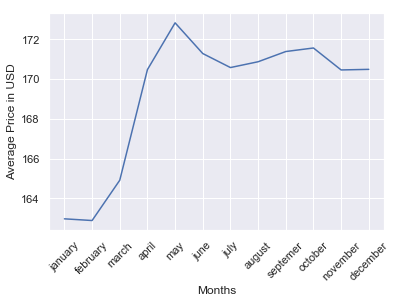

In [106]:
# plotting a barplot for number of missing values versus the columns

plt.plot(month_price_avg_df.month, month_price_avg_df.avg_price);
plt.xticks(rotation=45);
plt.xlabel("Months");
plt.ylabel("Average Price in USD");

## Findings:
It is evident that `April to July` is the peak season with average price ranging from  `$170`  to `$174` and `January to March` are comparatively lower with average price ranging from  `$163`  to `$165`.

## Q3. Find the Top Hosts based on User Reviews and Top Hosts' neighbourhood

In [107]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...
5,2818,4748,2009-06-29,20192,Jie,Daniel was a great host! He made everything so...
6,2818,5202,2009-07-07,23055,Vanessa,Daniele is an amazing host! He provided everyt...
7,2818,9131,2009-09-06,26343,Katja,You can´t have a nicer start in Amsterdam. Dan...
8,2818,12103,2009-10-01,40999,Marie-Eve,Daniel was a fantastic host. His place is calm...
9,2818,16196,2009-11-04,38623,Graham,Daniel was great. He couldn.t do enough for us...


In [108]:
# ref: https://www.nltk.org/api/nltk.sentiment.html#module-nltk.sentiment.vader
# using NLTK's SentimentIntensityAnalyzer, it calculates the score from -1 to +1
# score = 0: neutral sentiment 
# score < 0: negative sentiment
# score > 0: positive sentiment

sid = SentimentIntensityAnalyzer()

In [109]:
# function to calculate the sentiments of the user reviews

def nltk_sentiment(input_text):
    score_dict = sid.polarity_scores(input_text)
    return score_dict['compound']

In [110]:
reviews['comments'][0]

'Daniel is really cool. The place was nice and clean. Very quiet neighborhood. He had maps and a lonely planet guide book in the room for you to use. I didnt have any trouble finding the place from Central Station. I would defintely come back! Thanks!'

In [111]:
# testing the function

nltk_sentiment(reviews['comments'][0])

0.8843

In [112]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493815 entries, 0 to 493814
Data columns (total 6 columns):
listing_id       493815 non-null int64
id               493815 non-null int64
date             493815 non-null object
reviewer_id      493815 non-null int64
reviewer_name    493815 non-null object
comments         493583 non-null object
dtypes: int64(3), object(3)
memory usage: 22.6+ MB


In [113]:
# applying the function to the whole column

reviews['Sentiment_NLTK'] = reviews['comments'].apply(lambda x: nltk_sentiment(str(x)))

In [114]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493815 entries, 0 to 493814
Data columns (total 7 columns):
listing_id        493815 non-null int64
id                493815 non-null int64
date              493815 non-null object
reviewer_id       493815 non-null int64
reviewer_name     493815 non-null object
comments          493583 non-null object
Sentiment_NLTK    493815 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 26.4+ MB


In [115]:
# creating a new dataframe where I'm grouping the listing_id column i.e. according to the listings
# and further calculating the average of the sentiment score

reviews_avg = reviews.groupby(['listing_id']).mean()['Sentiment_NLTK']

In [116]:
# The top 5 hosts:

reviews_avg.nlargest()

listing_id
7720255     0.9977
6007508     0.9972
8916311     0.9972
28781840    0.9971
7494220     0.9970
Name: Sentiment_NLTK, dtype: float64

In [117]:
# creating a top_hosts dataframe

top_hosts = pd.DataFrame()
listing_ids = list(reviews_avg.nlargest().index)
for idx in listing_ids:
    top_hosts = top_hosts.append(listings[listings.id==idx])
top_hosts.reset_index(inplace=True)
del top_hosts['index']

In [125]:
# finding the names of top hosts' property

top_hosts.host_name

0     Laila
1     Karen
2    Emelie
3      Elif
4     Joren
Name: host_name, dtype: object

In [118]:
# finding the neighbourhood of top hosts' property

top_hosts.neighbourhood_cleansed

0                  Westerpark
1                Centrum-Oost
2      De Baarsjes - Oud-West
3    IJburg - Zeeburgereiland
4     De Pijp - Rivierenbuurt
Name: neighbourhood_cleansed, dtype: object

In [119]:
list(top_hosts.neighbourhood_cleansed)

['Westerpark',
 'Centrum-Oost',
 'De Baarsjes - Oud-West',
 'IJburg - Zeeburgereiland',
 'De Pijp - Rivierenbuurt']

In [120]:
# the positive reviews

list(reviews[reviews.listing_id==7720255].comments)

['Laila was in contact with us from the start of the booking period which allowed us to arrange the checking in process. Laila was away when we arrived but as we pre-discussed her sister, Eliza met us and talked us through everything we needed to know such as traveling around amsterdam, and general instructions such as the coffee machine. \r\nWe had been left a bottle of wine which was a really lovely start to a fantastic holiday. \r\n\r\nThe accommodation was so clean, homely and welcoming, it really did feel like a home from home. Laila had left a welcome pack which is the best I have seen so far, it had absolutely every single question you could think of answered.\r\n\r\nThe centre of Amsterdam was only two stops on the Tram and with a 48 hour pass it was very cheap to travel around. The neighbours were also very welcoming and friendly. In the local area there was several lovely bars, quirky shops and of course a coffee shop.\r\n\r\nEliza met us again for check out at an early hour 

In [121]:
list(reviews[reviews.listing_id==6007508].comments)

["Karen's apartment is beautiful and comfortable. The living space is bright and open, and beautifully decorated. A great place to relax and unwind after a long day of sightseeing. The kitchen is lovely and has a balcony with a small table and chairs that provide the perfect place to eat your breakfast. The bed is extremely comfortable and is even adjustable with a little remote on the bedside table! \r\n\r\nThe location was great for my traveling companion and me, as we love walking and getting to know cities by foot. The apartment is a short bus ride from Amsterdam Centraal, but close enough that it's also walkable if your luggage isn't too cumbersome (my friend and I chose to walk since the weather was lovely during our stay and we had small weekend bags). It is also a pleasant 15-20 minute walk from most major sightseeing attractions, but located in a more quiet local neighborhood, and we loved having a grocery store a couple of blocks away! \r\n\r\nKaren was out of town during our

In [122]:
list(reviews[reviews.listing_id==8916311].comments)

["We loved our stay at Emelie's house.  The location is perfect. Right next to the beautiful park Vondelpark and close to central Amsterdam, but away from the frenzy. \nThe house is very pretty, very comfortable,  warm and functional. The house was clean. \nThe kitchen is very equipped and gives access to a small garden very cute and nice.\nUpstairs, the room is very comfortable, bedding also and it is bright with a balcony.\nThere is a 2nd room also for children that our little girl enjoyed.\nWe did not know Emelie but she was always was helpful, responsive, attentive and left us all the info we needed.\nWe had a wonderful stay at Emelie.\nI would definitely recommend this for others who want to enjoy Amsterdam and would book it myself again -- \nThanks Emelie"]

In [123]:
list(reviews[reviews.listing_id==28781840].comments)

['We were the very first guests to stay at Elif’s apartment so naturally we weren’t sure what to expect - but it certainly lived up to its pictures and more!! Clean, comfortable, super stylish, fantastic location right on a tram station with 5 or 6 stops to the central station where all other public transport converges. Elif greeted us on arrival, showed us around and was on hand in the area if we had any issues (we didn’t!), she was friendly, helpful and generous. Particular features we loved were the swing in the middle of the lounge and the magnetic chalk-board kitchen wall where we left our thank yous. And the balcony view of the floating/repurposed shipping container houses was fabulous - we made great use of the winter blankets to sit out for a morning cup of coffee/evening glass of wine looking out at the water! Literally couldn’t have asked for a better place to stay!']

In [124]:
# reviews[reviews.listing_id==7494220]
list(reviews[reviews.listing_id==7494220].comments)

["This apartment is in a very trendy area of Amsterdam, De Pjip, with easy walking access to shops, a gorgeous local park, great little bistros for good hearty meals and all the central areas; the tram was also accessible. During our stay we did not take any public transport but simply walked. The apartment was clean and comfy, uncluttered, well laid out, perfect for a couple, and instantly made us feel like it was our own little place. The bathroom is a little compact but one adjusts reasonably quickly. We didn't use the kitchen facilities much as it was easier to eat out. If you are coming to Amsterdam to mostly visit and sight-see, this place is a perfect pad in a great location for a few days stay, great for coming back to. Wifi connectivity was fantastic. From enquiry to booking, the host was very amenable to answering all questions, very helpful and friendly and made it all very easy. We had a late flight so he enabled a late check out for a small sum. All in all a wonderful stay